# 1번 활성함수

In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

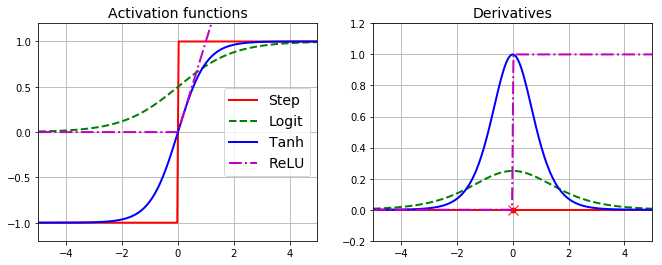

In [4]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# 2번 오류역전파

In [226]:
import numpy as np
np.random.seed(0)
 
N, D = 3, 4
 
x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)
 
a = x * y
b = a + z
c = np.sum(b)

In [228]:
x

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]])

In [232]:
y

array([[ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502]])

In [230]:
b

array([[ 3.61226501, -1.40567654,  0.48018432,  0.56054468],
       [ 4.32305853,  1.6698554 ,  0.45238942,  0.50743607],
       [-0.62426907, -1.71242165, -0.22339567, -0.92296196]])

In [231]:
c

6.717008537800067

In [233]:
grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a * y
grad_y = grad_a * x

print(grad_c)
print(grad_b)
print(grad_a)
print(grad_z)
print(grad_x)
print(grad_y)

1.0
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


In [234]:
import torch
from torch.autograd import Variable
 
N, D = 3, 4
 
x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D, requires_grad=True)
z = torch.randn(N, D)
 
a = x * y
b = a + z
c = torch.sum(b)
 
c.backward()

print(grad_x)
print(grad_y)

[[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


In [235]:
c

tensor(1.2064, grad_fn=<SumBackward0>)

# 3번 오류역전파

In [8]:
import torch

x = torch.randn(1,10)
prev_h = torch.randn(1,20)
w_h = torch.randn(20,20)
w_x = torch.randn(20,10)

i2h = torch.mm(w_x, x.t())
h2h = torch.mm(w_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

In [26]:
loss = next_h.sum()
loss = Variable(loss, requires_grad = True)
loss.backward()

print(loss)

tensor(4.0265, requires_grad=True)


# 4번 신경망 학습

In [266]:
import torch

# N : batch size  /   D_in :input dimension
# H : hidden dimension  /   D_out : output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# random하게 input and output data 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# random 값으로 weights 초기화
w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

loss_list = []
learning_rate = 1e-6
for t in range(500):
    # Forward pass: predicted y 계산
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    loss_list.append(loss)
    print(t, loss)
    
    # Backprop(오류 역전파) : loss값에 대해 w1, w2의 gradients계산 
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # descent값 이용하여 weights 값 update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    


0 27910146.0
1 22078090.0
2 20204742.0
3 19141208.0
4 17381200.0
5 14427564.0
6 10862331.0
7 7493925.5
8 4908798.0
9 3152427.0
10 2052663.0
11 1383337.5
12 977523.5625
13 724908.75
14 561833.0625
15 451362.1875
16 372643.03125
17 313896.75
18 268420.96875
19 231995.453125
20 202119.8125
21 177157.375
22 156029.703125
23 137969.171875
24 122400.9921875
25 108903.875
26 97147.4765625
27 86874.78125
28 77872.2109375
29 69951.4453125
30 62955.0625
31 56753.4609375
32 51247.25
33 46349.60546875
34 41979.64453125
35 38076.125
36 34580.67578125
37 31444.63671875
38 28626.6640625
39 26091.669921875
40 23806.083984375
41 21742.8359375
42 19879.158203125
43 18193.021484375
44 16665.296875
45 15278.984375
46 14020.7861328125
47 12877.126953125
48 11835.810546875
49 10887.166015625
50 10021.80859375
51 9231.5869140625
52 8509.095703125
53 7848.20166015625
54 7243.29638671875
55 6688.95361328125
56 6180.48828125
57 5713.88427734375
58 5285.72216796875
59 4892.05859375
60 4530.32666015625
61 4197.53

381 0.00026528426678851247
382 0.0002587443741504103
383 0.00025259717949666083
384 0.0002463327255100012
385 0.00023931371106300503
386 0.00023349652474280447
387 0.00022752032964490354
388 0.00022241008991841227
389 0.00021689868299290538
390 0.00021174833818804473
391 0.00020654662512242794
392 0.00020206726912874728
393 0.00019697057723533362
394 0.00019257016538176686
395 0.00018836815434042364
396 0.00018396033556200564
397 0.0001796706346794963
398 0.00017540375120006502
399 0.0001720505824778229
400 0.0001688300253590569
401 0.00016480845806654543
402 0.0001611668267287314
403 0.0001577088696649298
404 0.00015496845298912376
405 0.00015095148410182446
406 0.00014823631499893963
407 0.00014482522965408862
408 0.0001417707244399935
409 0.0001392829290125519
410 0.00013712112559005618
411 0.0001336826680926606
412 0.0001312526874244213
413 0.00012842963042203337
414 0.00012559078459162265
415 0.000123350226203911
416 0.00012096393766114488
417 0.00011835643817903474
418 0.00011617

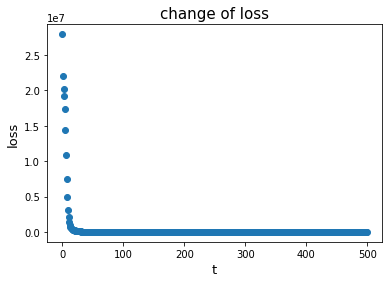

In [274]:
x = range(0, 500)
y = loss_list
plt.scatter(x, y)
plt.title("change of loss", size=15)
plt.xlabel("t", size=13)
plt.ylabel("loss", size=13)
plt.show()

# 5번 신경망학습

In [279]:
import torch

N, D_in, H, D_out = 64, 1000, 100, 10

# input과 output에 대한 random Tensors 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# weight에 대한 random Tensors 생성
# requires_grad=True : backward pass하는동안 이러한 tensors들에 관련한 gradient 계산하겠다.
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

loss_list = []
learning_rate = 1e-6
for t in range(500):
    # Forward pass: tensors에 있는 연산으로 predicted y 계산 using operations on Tensors
    # 위의 예시와 유사하지만 계산중간에 나온 값 저장 안함.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # tensors에 있는 연산으로 loss 계산 및 출력
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    loss_list.append(loss.item())
    print(t, loss.item())

    # backward pass : requires_grad=True인 모든 tensors들의 gradient 계산
    loss.backward()

    # Manually update weights using gradient descent. 
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 27730768.0
1 24610336.0
2 24980410.0
3 25204618.0
4 23033670.0
5 18039258.0
6 12124926.0
7 7253363.0
8 4149877.5
9 2429972.0
10 1529001.875
11 1051999.375
12 784581.75
13 621183.0
14 511649.9375
15 432065.0625
16 370665.09375
17 321281.34375
18 280555.71875
19 246354.75
20 217382.8125
21 192593.828125
22 171229.671875
23 152745.03125
24 136685.015625
25 122663.3828125
26 110372.3671875
27 99576.90625
28 90048.453125
29 81619.6328125
30 74139.078125
31 67483.640625
32 61554.35546875
33 56254.22265625
34 51494.2421875
35 47215.71484375
36 43359.40625
37 39877.5
38 36729.6171875
39 33875.94921875
40 31285.798828125
41 28931.908203125
42 26787.62890625
43 24829.72265625
44 23039.47265625
45 21400.962890625
46 19898.958984375
47 18519.837890625
48 17252.421875
49 16088.19140625
50 15015.2265625
51 14025.4814453125
52 13111.9169921875
53 12267.3193359375
54 11485.5771484375
55 10761.3642578125
56 10089.7822265625
57 9466.8515625
58 8887.939453125
59 8349.55078125
60 7848.677734375
61 7382.

428 0.0041417405009269714
429 0.004013067111372948
430 0.0038885173853486776
431 0.0037724352441728115
432 0.003659093752503395
433 0.0035440316423773766
434 0.0034356906544417143
435 0.0033303338568657637
436 0.003232632065191865
437 0.003136160084977746
438 0.0030421034898608923
439 0.0029519712552428246
440 0.00286616082303226
441 0.0027803247794508934
442 0.002698333002626896
443 0.0026183067820966244
444 0.0025412996765226126
445 0.002465029014274478
446 0.002395262010395527
447 0.002326963935047388
448 0.002260057255625725
449 0.002193234395235777
450 0.0021307640708982944
451 0.0020693016704171896
452 0.0020138658583164215
453 0.0019567518029361963
454 0.001901384792290628
455 0.001844749553129077
456 0.001795083051547408
457 0.0017446567071601748
458 0.0016972939483821392
459 0.0016519243363291025
460 0.0016052019782364368
461 0.0015605917433276772
462 0.0015186290256679058
463 0.0014788743574172258
464 0.0014387313276529312
465 0.0014002162497490644
466 0.0013640029355883598
4

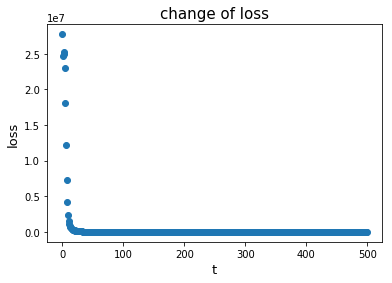

In [281]:
x = range(0, 500)
y = loss_list
plt.scatter(x, y)
plt.title("change of loss", size=15)
plt.xlabel("t", size=13)
plt.ylabel("loss", size=13)
plt.show()

# 6번 신경망학습

    class MyReLU
    """
        We can implement our own custom autograd Functions by subclassing
        torch.autograd.Function and implementing the forward and backward passes
        which operate on Tensors.
     """

    def forward(ctx, x):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        

    def backward(ctx, grad_y):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """

In [283]:
import torch


class MyReLU(torch.autograd.Function):

    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_y):
        x, = ctx.saved_tensors
        grad_input = grad_y.clone()
        grad_input[x < 0] = 0
        return grad_input

def my_relu(x):
    return MyReLU.apply(x)

N, D_in, H, D_out = 64, 1000, 100, 10

# input과 output에 대한 random Tensors 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# weight에 대한 random Tensors 생성
# requires_grad=True : backward pass하는동안 이러한 tensors들에 관련한 gradient 계산하겠다.
w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

loss_list = []
learning_rate = 1e-6
for t in range(500):
    # Forward pass: tensors에 있는 연산으로 predicted y 계산 using operations on Tensors
    # 위의 예시와 유사하지만 계산중간에 나온 값 저장 안함.
    y_pred = my_relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    loss_list.append(loss.item())
    print(t, loss.item())

    # backward pass : requires_grad=True인 모든 tensors들의 gradient 계산
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 27691130.0
1 21166584.0
2 18288060.0
3 16237454.0
4 14080006.0
5 11479834.0
6 8827195.0
7 6409146.0
8 4515425.0
9 3134489.75
10 2195500.25
11 1567721.25
12 1154103.5
13 877165.0625
14 688365.25
15 555431.1875
16 458729.25
17 385943.6875
18 329365.625
19 284193.09375
20 247268.09375
21 216540.484375
22 190661.109375
23 168623.6875
24 149659.453125
25 133217.4375
26 118892.6015625
27 106376.1328125
28 95382.1875
29 85669.5
30 77074.4921875
31 69448.8125
32 62673.88671875
33 56642.8984375
34 51261.7890625
35 46448.22265625
36 42137.48828125
37 38274.3203125
38 34805.65625
39 31685.318359375
40 28877.603515625
41 26347.9453125
42 24057.115234375
43 21985.669921875
44 20110.705078125
45 18411.861328125
46 16870.400390625
47 15471.2734375
48 14199.92578125
49 13043.2822265625
50 11990.505859375
51 11031.142578125
52 10155.8095703125
53 9356.556640625
54 8625.9912109375
55 7957.826171875
56 7346.26416015625
57 6785.92822265625
58 6272.33544921875
59 5801.44140625
60 5369.59375
61 4972.82470

383 0.0008905967697501183
384 0.0008621474844403565
385 0.0008371865260414779
386 0.0008111598435789347
387 0.000787953962571919
388 0.0007639845134690404
389 0.0007424551877193153
390 0.0007204378489404917
391 0.0007001616759225726
392 0.0006806644378229976
393 0.0006610203417949378
394 0.0006416375399567187
395 0.0006239403737708926
396 0.0006071261595934629
397 0.0005901886615902185
398 0.0005723667563870549
399 0.0005585877224802971
400 0.0005424832925200462
401 0.0005274766590446234
402 0.0005129767814651132
403 0.0004989855224266648
404 0.0004867822863161564
405 0.0004737301787827164
406 0.0004621097759809345
407 0.00045034903450869024
408 0.00043818680569529533
409 0.0004282252921257168
410 0.0004169628955423832
411 0.00040664104744791985
412 0.00039636349538341165
413 0.0003864444443024695
414 0.0003773026110138744
415 0.00036831683246418834
416 0.0003589773259591311
417 0.0003503139887470752
418 0.00034198936191387475
419 0.0003342457057442516
420 0.0003260728844907135
421 0.0

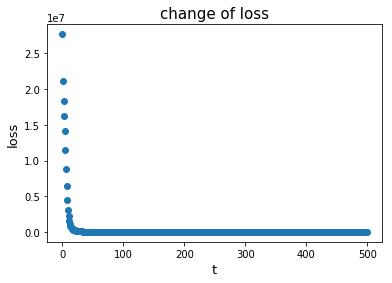

In [284]:
x = range(0, 500)
y = loss_list
plt.scatter(x, y)
plt.title("change of loss", size=15)
plt.xlabel("t", size=13)
plt.ylabel("loss", size=13)
plt.show()

# 7번 신경망 학습


    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """


    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """

In [286]:
import torch

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10

# input과 output에 대한 random Tensors 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 위에서 정의한 클래스로 모델 구성
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

loss_list = []
for t in range(500):
    # Forward pass: model에 x를 넣었을때 나오는 예측한 y값 계산
    y_pred = model(x)

    # Compute and print loss
    loss = torch.nn.functional.mse_loss(y_pred, y)
    loss_list.append(loss.item())
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 1.0934909582138062
1 1.0933502912521362
2 1.0932096242904663
3 1.0930689573287964
4 1.0929282903671265
5 1.092787742614746
6 1.0926471948623657
7 1.0925066471099854
8 1.0923662185668945
9 1.0922256708145142
10 1.092085361480713
11 1.091944932937622
12 1.0918045043945312
13 1.09166419506073
14 1.0915238857269287
15 1.0913835763931274
16 1.0912432670593262
17 1.0911030769348145
18 1.0909628868103027
19 1.090822696685791
20 1.0906825065612793
21 1.0905424356460571
22 1.090402364730835
23 1.0902622938156128
24 1.0901223421096802
25 1.089982271194458
26 1.0898423194885254
27 1.0897024869918823
28 1.0895625352859497
29 1.0894227027893066
30 1.089282751083374
31 1.089142918586731
32 1.0890032052993774
33 1.0888633728027344
34 1.0887236595153809
35 1.0885839462280273
36 1.0884442329406738
37 1.0883046388626099
38 1.0881649255752563
39 1.0880253314971924
40 1.0878859758377075
41 1.0877466201782227
42 1.0876072645187378
43 1.0874680280685425
44 1.0873286724090576
45 1.0871894359588623
46 1.087

387 1.0414501428604126
388 1.0413222312927246
389 1.0411943197250366
390 1.0410665273666382
391 1.0409386157989502
392 1.0408108234405518
393 1.0406830310821533
394 1.0405552387237549
395 1.0404274463653564
396 1.0402997732162476
397 1.0401721000671387
398 1.0400444269180298
399 1.039916753768921
400 1.039789080619812
401 1.0396615266799927
402 1.0395339727401733
403 1.039406418800354
404 1.0392789840698242
405 1.0391515493392944
406 1.0390241146087646
407 1.0388967990875244
408 1.0387696027755737
409 1.0386422872543335
410 1.0385149717330933
411 1.0383877754211426
412 1.038260579109192
413 1.0381333827972412
414 1.0380061864852905
415 1.0378789901733398
416 1.0377520322799683
417 1.0376251935958862
418 1.0374982357025146
419 1.0373713970184326
420 1.0372445583343506
421 1.0371177196502686
422 1.036991000175476
423 1.036864161491394
424 1.0367374420166016
425 1.0366106033325195
426 1.036483883857727
427 1.0363572835922241
428 1.0362305641174316
429 1.0361039638519287
430 1.035977244377

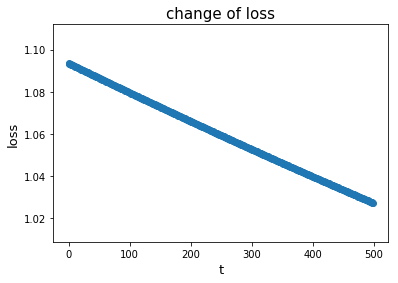

In [289]:
x = range(0, 500)
y = loss_list
plt.scatter(x, y)
plt.title("change of loss", size=15)
plt.xlabel("t", size=13)
plt.ylabel("loss", size=13)
plt.show()

# 8번 데이터 전처리

In [295]:
import torch
from torch.utils.data import TensorDataset, DataLoader

N,D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

loader = DataLoader(TensorDataset(x,y), batch_size=8)
model = TwoLayerNet(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

loss_list = []
final_loss_list = []
for epoch in range(20):
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        loss_list.append(loss.item())
            
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    loss_avg = np.mean(loss_list)
    final_loss_list.append(loss_avg)
    print(epoch, loss_avg)

0 1.0816268920898438
1 1.0334215126931667
2 0.9903638462225596
3 0.9514521583914757
4 0.9159837529063225
5 0.8834101793666681
6 0.8532873296311924
7 0.8251854525879025
8 0.7987953387200832
9 0.7738874141126871
10 0.750279575586319
11 0.7278329590335488
12 0.7064419414561528
13 0.6860153504780361
14 0.6664607517421246
15 0.6477110923733562
16 0.629708861165187
17 0.6124035035156541
18 0.5957630222761318
19 0.5797523756511509


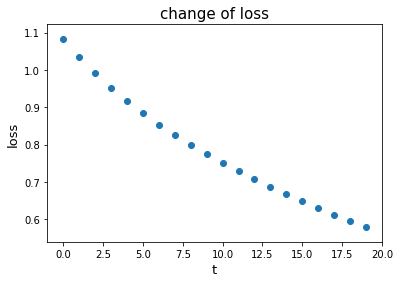

In [305]:
x = range(0, 20)
y = final_loss_list
plt.xlim([-1,20])
plt.scatter(x, y)
plt.title("change of loss", size=15)
plt.xlabel("t", size=13)
plt.ylabel("loss", size=13)
plt.show()

# 9번 영상 인식

In [319]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

is_cuba=False
if torch.cuda.is_available():
    is_cuba = True
    
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = datasets.MNIST('data/', train = True, transform = transformation, download=True)
test_dataset = datasets.MNIST('data/', train = False, transform = transformation, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

sample_data = next(iter(train_loader))

def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image, cmap='gray')

In [354]:
sample_data

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

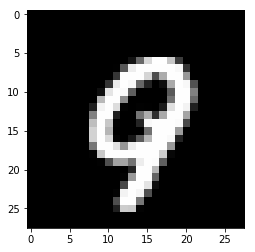

In [320]:
plot_img(sample_data[0][2])

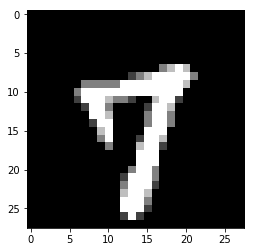

In [321]:
plot_img(sample_data[0][1])

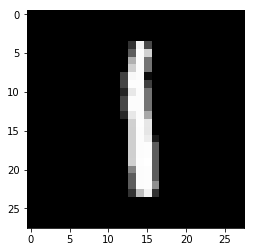

In [337]:
plot_img(sample_data[0][3])

In [322]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
model = Net()
    
optimizer = optim.SGD(model.parameters(), lr=0.01)

data, target = next(iter(train_loader))

output=  model(Variable(data))

In [323]:
output.size()

torch.Size([32, 10])

In [324]:
target.size()

torch.Size([32])

In [355]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':  # 학습을 진행한다면 
        model.train()
    if phase == 'validation':  # 검증을 진행한다면 volatile을 True로 함으로써 auto grad를 무시한다.
        model.eval()
        volatile=True

    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        data , target = Variable(data, volatile), Variable(target)  # 데이터를 Variable 객체로 Wrapping 한다.
        
        if phase == 'training':
            optimizer.zero_grad()  # 학습 전 gradient를 0으로 초기화한다.
        output = model(data)  # forward pass
        loss = F.nll_loss(output,target)  # negative log-likelyhood 함수를 loss 함수로 사용한다.
        
        running_loss += F.nll_loss(output, target, size_average=False).data.item()  # 매 iter마다 생기는 loss를
                                                                                    # running_loss에 더한다.
        preds = output.data.max(dim=1, keepdim=True)[1]  # 결과 값 중 가장 확률이 큰 인덱스를 찾는다. (argmax)
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum().item()  # 매 iter마다 정답과 예측값이 맞은
                                                                                    # 개수를 더한다.
        if phase =='training':  # 학습중일 경우 backward 연산 후 가중치를 갱신한다.
            loss.backward()  # 실제 갱신은 loss로 수행하고, running_loss는 학습 진행 양상을 보기 위해 사용한다.
            optimizer.step()
    
    data_loader_size = len(data_loader.dataset)
    loss = running_loss/data_loader_size  # 매 iter마다 평균 loss를 구한다.
    accuracy = 100. * running_correct/data_loader_size  # 맞은 개수에 따른 백분율 값을 구한다.

    print('{0:10} loss is {1:>6.2}, and {0:10} accuracy is {2:5}/{3:5}{4:10.4}'.format(phase, loss, running_correct, data_loader_size, accuracy))
    return loss, accuracy

In [356]:
# train data의 loss, accuracy
# validation set의 loss, accuracy
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,20):
    print('epoch {}'.format(epoch))
    epoch_loss, epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, test_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(val_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

epoch 1


/usr/local/lib/python3.5/dist-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


training   loss is   0.38, and training   accuracy is 53139/60000     88.56
validation loss is   0.11, and validation accuracy is  9668/10000     96.68
epoch 2
training   loss is   0.15, and training   accuracy is 57273/60000     95.45
validation loss is  0.072, and validation accuracy is  9747/10000     97.47
epoch 3
training   loss is   0.12, and training   accuracy is 57820/60000     96.37
validation loss is  0.055, and validation accuracy is  9815/10000     98.15
epoch 4
training   loss is    0.1, and training   accuracy is 58212/60000     97.02
validation loss is  0.046, and validation accuracy is  9857/10000     98.57
epoch 5
training   loss is   0.09, and training   accuracy is 58405/60000     97.34
validation loss is  0.042, and validation accuracy is  9860/10000      98.6
epoch 6
training   loss is  0.083, and training   accuracy is 58519/60000     97.53
validation loss is  0.035, and validation accuracy is  9894/10000     98.94
epoch 7
training   loss is  0.074, and training 

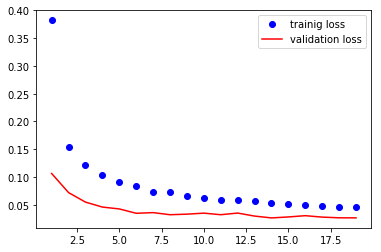

In [357]:
plt.plot(range(1, len(train_losses)+1), train_losses, 'bo', label='trainig loss')
plt.plot(range(1, len(val_losses)+1), val_losses, 'r', label='validation loss')
plt.legend()

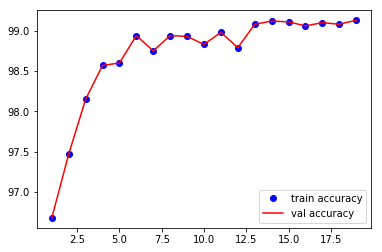

In [358]:
plt.plot(range(1, len(train_accuracy)+1), train_accuracy, 'bo',label='train accuracy')
plt.plot(range(1, len(val_accuracy)+1), val_accuracy, 'r', label='val accuracy')
plt.legend()

# 10번 퍼셉트론

In [48]:
def NOR(x1, x2) :
    x = np.array([1, x1, x2])
    w = np.array([1, -2, -2])
    result = x.dot(w)

    if result > 0 :
        return 1
    else :
        return -1

In [49]:
NOR(0,0)

1

In [50]:
NOR(1,0)

-1

In [51]:
NOR(0,1)

-1

In [52]:
NOR(1,1)

-1

In [60]:
def AND(x1, x2) :
    x = np.array([1, x1, x2])
    w = np.array([-1.5, 1.0, 1.0])
    result = x.dot(w)

    if result > 0 :
        return 1
    else :
        return -1

In [61]:
AND(0,0)

-1

In [62]:
AND(1,0)

-1

In [63]:
AND(0,1)

-1

In [64]:
AND(1,1)

1

# 11번 DMLP

(1) 가중치 행렬

In [201]:
U1 = np.array([[-0.3, 1.0, 1.2],
               [1.6, -1.0, -1.1]])

In [202]:
U2 = np.array([[1.0, 1.0, -1.0],
               [0.7, 0.5, 1.0]])

In [203]:
U3 = np.array([[0.5, -0.8, 1.0],
               [-0.1, 0.3, 0.4]])

In [204]:
U4 = np.array([[1.0, 0.1, -0.2],
               [-0.2, 1.3, -0.4]])

In [205]:
print(U1)
print('\n')
print(U2)
print('\n')
print(U3)
print('\n')
print(U4)

[[-0.3  1.   1.2]
 [ 1.6 -1.  -1.1]]


[[ 1.   1.  -1. ]
 [ 0.7  0.5  1. ]]


[[ 0.5 -0.8  1. ]
 [-0.1  0.3  0.4]]


[[ 1.   0.1 -0.2]
 [-0.2  1.3 -0.4]]


(2) 출력 구하기. 활성함수: 로지스틱 시그모이드

In [206]:
z = np.array([1,1,0])
output =[0,0]
for i in range(2):
    output[i] = logit(z.dot(U1[i]))

In [207]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = logit(z.dot(U2[i]))

In [208]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = logit(z.dot(U3[i]))

In [209]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = logit(z.dot(U4[i]))

In [210]:
output

[0.7202129099819784, 0.6080707687639114]

(3) 출력 구하기. 활성함수: ReLU

In [211]:
z = np.array([1,1,0])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U1[i]))

In [212]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U2[i]))

In [213]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U3[i]))

In [214]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U4[i]))

In [215]:
output

[0.949, 1.095]

In [216]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [217]:
expect = np.array([0,1])
rmse(output, expect)

0.67439825029429

(4) 가중치 변화 -> 오류에 미치는 영향

In [218]:
U3_new = np.array([[0.5, -0.8, 0.9],
               [-0.1, 0.3, 0.4]])

In [219]:
z = np.array([1,1,0])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U1[i]))

In [220]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U2[i]))

In [221]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U3_new[i]))

In [223]:
z = np.array([1,output[0],output[1]])
output =[0,0]
for i in range(2):
    output[i] = relu(z.dot(U4[i]))

In [224]:
output

[0.9325, 0.8805000000000001]

In [225]:
rmse(output, expect)

0.6647693208925936

활성함수 ReLU를 이용하여 output을 구하였을때 가중치를 줄였을때 RMSE가 감소하였다. 

# 12번 텐서의 컨볼루션 연산

In [156]:
R = np.array([
            [0,0,0,0,0],
            [0,1,1,1,0],
            [0,2,1,3,0],
            [0,0,1,0,0],
            [0,0,0,0,0]
])
G = np.array([
            [0,0,0,0,0],
            [0,2,2,2,0],
            [0,1,0,1,0],
            [0,0,0,1,0],
            [0,0,0,0,0]
])
B = np.array([
            [0,0,0,0,0],
            [0,0,3,0,0],
            [0,1,0,1,0],
            [0,1,0,0,0],
            [0,0,0,0,0]
])
k1 = np.array([
            [0,0,0],
            [0,0,1],
            [0,1,0]
])
k2 = np.array([
            [0,2,0],
            [0,2,0],
            [0,2,0]
])
k3 = np.array([
            [1,0,0],
            [0,2,0],
            [0,0,1]
])

In [174]:
k = (k1.dot(k2)).dot(k3)

In [163]:
tmpr = R[0:3,0:3]
print (tmpr)

tmpg = G[0:3,0:3]
print(tmpg)

tmpb = B[0:3,0:3]
print(tmpb)

[[0 0 0]
 [0 1 1]
 [0 2 1]]
[[0 0 0]
 [0 2 2]
 [0 1 0]]
[[0 0 0]
 [0 0 3]
 [0 1 0]]


In [177]:
RGB = (tmpr.dot(tmpg)).dot(tmpb)

In [182]:
sum = 0
for i in range(3):
    sum += tmpr[i].dot(k1[i])
    sum += tmpg[i].dot(k2[i])
    sum += tmpb[i].dot(k3[i])
    
print (sum)

9


In [188]:
sum = np.zeros([3,3])
sum

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [189]:
for i in range(3):
    for j in range(3):
        tmpr = R[i:i+3, j:j+3]
        tmpg = G[i:i+3, j:j+3]
        tmpb = B[i:i+3, j:j+3]
        
        for k in range(3):
            sum[i,j] += tmpr[k].dot(k1[k])
            sum[i,j] += tmpg[k].dot(k2[k])
            sum[i,j] += tmpb[k].dot(k3[k])

In [190]:
sum

array([[ 9., 13.,  9.],
       [ 9.,  8., 13.],
       [ 5.,  1.,  4.]])

# 13번 출력의 크기, 매개변수의 수 구하기

In [198]:
def output_and_parameter(k, f, s, p):
    w1=32
    h1=32
    d1=3
    
    w2 = (w1 - f + 2*p)/s + 1
    h2 = (h1 - f + 2*p)/s + 1
    d2 = k

    num = (f*f*d1)*k *k
   
    print ('출력의 크기(w2 * h2 * d2): ', int(w2), '*', int(h2), '*', int(k))
    
    print('매개변수의 수: ', num)

In [199]:
output_and_parameter(10,5,1,2)

출력의 크기(w2 * h2 * d2):  32 * 32 * 10
매개변수의 수:  7500


In [200]:
output_and_parameter(64,3,1,1)

출력의 크기(w2 * h2 * d2):  32 * 32 * 64
매개변수의 수:  110592
